## Day 2 -- Lines
---

Depicting Metro railways in Tashkent

In [2]:
import osmnx as ox
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tags = {"railway": 'subway'}
address = 'Tashkent City'

gdf = ox.features_from_address(address, tags=tags, dist=20000)
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 222 entries, ('way', 102653922) to ('way', 1340718423)
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   geometry      222 non-null    geometry
 1   railway       222 non-null    object  
 2   name          88 non-null     object  
 3   name:en       2 non-null      object  
 4   name:ru       79 non-null     object  
 5   name:uz       8 non-null      object  
 6   wikidata      2 non-null      object  
 7   wikipedia     6 non-null      object  
 8   layer         96 non-null     object  
 9   electrified   221 non-null    object  
 10  frequency     189 non-null    object  
 11  gauge         221 non-null    object  
 12  service       137 non-null    object  
 13  tunnel        156 non-null    object  
 14  voltage       189 non-null    object  
 15  bridge        28 non-null     object  
 16  colour        17 non-null     object  
 17  oneway       

In [4]:
metro_ways_gdf = gdf.loc[:, ['geometry', 'name', 'colour', 'usage']]
metro_ways_gdf = metro_ways_gdf[metro_ways_gdf['geometry'].type == 'LineString']

metro_ways_gdf

geometry  \
element id                                                              
way     102653922   LINESTRING (69.20016 41.24886, 69.19969 41.249...   
        104289984   LINESTRING (69.28581 41.34338, 69.28632 41.34611)   
        104290223   LINESTRING (69.23065 41.29781, 69.23014 41.297...   
        104290426   LINESTRING (69.30441 41.32133, 69.30333 41.321...   
        166334441   LINESTRING (69.32626 41.29039, 69.32551 41.28986)   
...                                                               ...   
        1340718419  LINESTRING (69.22052 41.20501, 69.22196 41.20559)   
        1340718420  LINESTRING (69.22001 41.20482, 69.22014 41.204...   
        1340718421  LINESTRING (69.22029 41.20498, 69.21999 41.204...   
        1340718422  LINESTRING (69.21808 41.20403, 69.22001 41.204...   
        1340718423  LINESTRING (69.22052 41.20501, 69.22032 41.204...   

                                                             name colour usage  
element id                                                                      
way     102653922                                             NaN    NaN   NaN  
        104289984                                 Yunusobod yoʻli  green   NaN  
        104290223                                 Chilonzor yoʻli    NaN   NaN  
        104290426                                 Chilonzor yoʻli    NaN   NaN  
        166334441                                             NaN    NaN   NaN  
...                                                           ...    ...   ...  
        1340718419  Линия Тридцатилетия независимости Узбекистана    NaN  main  
        1340718420                                            NaN    NaN   NaN  
        1340718421                                            NaN    NaN   NaN  
        1340718422                                            NaN    NaN   NaN  
        1340718423                                            NaN    NaN   NaN  

[222 rows x 4 columns]

In [5]:
tags = {"station": "subway"}
metro_stations_gdf = ox.features_from_address(address, tags=tags, dist=20000)

metro_stations_gdf = metro_stations_gdf.loc[:, ['geometry', 'name', 'colour']]
metro_stations_gdf = metro_stations_gdf[metro_stations_gdf['geometry'].type == 'Point']

metro_stations_gdf

geometry                 name colour
element id                                                                
node    563751850    POINT (69.22362 41.29187)                Novza    red
        568770460      POINT (69.2431 41.3119)    Xalqlar doʻstligi    red
        852873027    POINT (69.21258 41.28203)       Mirzo Ulugʻbek    red
        854338154    POINT (69.20497 41.27436)            Chilonzor    red
        1252201486   POINT (69.23567 41.30339)          Milliy bogʻ    red
        1539317100   POINT (69.24583 41.32788)        G'afur G'ulom   blue
        1577932485   POINT (69.23682 41.32586)               Chorsu   blue
        1579080941   POINT (69.27405 41.29801)                Oybek   blue
        1579080943   POINT (69.27444 41.29964)            Mingoʻrik    NaN
        1582352956   POINT (69.28772 41.29329)             Toshkent   blue
        1631211328    POINT (69.2062 41.34462)              Beruniy   blue
        1633822600   POINT (69.28811 41.35312)           Shahriston    NaN
        1765133546   POINT (69.30513 41.29898)        Mashinasozlar   blue
        1770328496    POINT (69.21912 41.3323)             Tinchlik   blue
        1772575475   POINT (69.28176 41.32019)      Abdulla Qodiriy  green
        1772595534   POINT (69.28342 41.32689)                Minor    NaN
        1775804030   POINT (69.28457 41.33717)             Bodomzor  green
        1775848270   POINT (69.29574 41.31816)        Hamid Olimjon    red
        1775892797   POINT (69.26472 41.30516)         Kosmonavtlar   blue
        1777037919   POINT (69.32856 41.32611)     Buyuk Ipak Yoʻli    red
        1777037922    POINT (69.3111 41.32195)              Pushkin    red
        1777051509   POINT (69.28327 41.31267)  Amir Temur xiyoboni    red
        1777051512   POINT (69.28351 41.31389)        Yunus Rajabiy    NaN
        1777740153    POINT (69.2543 41.31892)       Alisher Navoiy   blue
        1777740154   POINT (69.25509 41.31779)             Paxtakor    NaN
        1777744035   POINT (69.25341 41.31194)          Oʻzbekiston   blue
        1777845992    POINT (69.1961 41.25667)              Olmazor    NaN
        1777856012   POINT (69.32224 41.29364)             Do'stlik   blue
        1778357473   POINT (69.27106 41.31495)  Mustaqillik maydoni    red
        7053509943    POINT (69.2923 41.36684)            Yunusobod    NaN
        7861940928   POINT (69.29602 41.37752)            Turkiston    NaN
        9972711745    POINT (69.36033 41.2817)                Olmos    NaN
        10537927077  POINT (69.32319 41.29463)            Texnopark    NaN
        10537927079  POINT (69.34978 41.29759)            Yashnobod    NaN
        10537927080  POINT (69.35618 41.29201)                Tuzel    NaN
        10537927081  POINT (69.36475 41.26529)                Rohat    NaN
        10537927082  POINT (69.35872 41.25651)            Yangiobod    NaN
        10537927083    POINT (69.327 41.23746)              Qo‘yliq    NaN
        10537931294  POINT (69.30832 41.24442)              Matonat    NaN
        10537931295  POINT (69.29972 41.24443)                Qiyot    NaN
        10538244112  POINT (69.19603 41.23825)            Choshtepa    NaN
        10538244113  POINT (69.20397 41.22734)            O‘zgarish    NaN
        10538244115  POINT (69.20884 41.22064)              Sergeli    NaN
        10538244119  POINT (69.21401 41.21349)           Yangihayot    NaN
        10538244120   POINT (69.21896 41.2067)               Chinor    NaN
        10538303447  POINT (69.28496 41.24448)              Tolarik    NaN
        10637629351  POINT (69.27044 41.23001)              Xonobod    NaN
        10637629352  POINT (69.26022 41.22145)          Quruvchilar    NaN
        11218653778  POINT (69.22141 41.20542)              Qipchok    NaN
        11218653779  POINT (69.23415 41.21068)                Turon    NaN

In [6]:
pd_gdf_ways = gpd.GeoDataFrame(metro_ways_gdf, geometry='geometry', crs=metro_ways_gdf.crs)
pd_gdf_stations = gpd.GeoDataFrame(metro_stations_gdf, geometry='geometry', crs=metro_stations_gdf.crs)

pd_gdf_ways

geometry  \
element id                                                              
way     102653922   LINESTRING (69.20016 41.24886, 69.19969 41.249...   
        104289984   LINESTRING (69.28581 41.34338, 69.28632 41.34611)   
        104290223   LINESTRING (69.23065 41.29781, 69.23014 41.297...   
        104290426   LINESTRING (69.30441 41.32133, 69.30333 41.321...   
        166334441   LINESTRING (69.32626 41.29039, 69.32551 41.28986)   
...                                                               ...   
        1340718419  LINESTRING (69.22052 41.20501, 69.22196 41.20559)   
        1340718420  LINESTRING (69.22001 41.20482, 69.22014 41.204...   
        1340718421  LINESTRING (69.22029 41.20498, 69.21999 41.204...   
        1340718422  LINESTRING (69.21808 41.20403, 69.22001 41.204...   
        1340718423  LINESTRING (69.22052 41.20501, 69.22032 41.204...   

                                                             name colour usage  
element id                                                                      
way     102653922                                             NaN    NaN   NaN  
        104289984                                 Yunusobod yoʻli  green   NaN  
        104290223                                 Chilonzor yoʻli    NaN   NaN  
        104290426                                 Chilonzor yoʻli    NaN   NaN  
        166334441                                             NaN    NaN   NaN  
...                                                           ...    ...   ...  
        1340718419  Линия Тридцатилетия независимости Узбекистана    NaN  main  
        1340718420                                            NaN    NaN   NaN  
        1340718421                                            NaN    NaN   NaN  
        1340718422                                            NaN    NaN   NaN  
        1340718423                                            NaN    NaN   NaN  

[222 rows x 4 columns]

In [7]:
map = folium.Map(location=[41.29964, 69.27444], zoom_start=12, tiles="CartoDBpositron")
coords = [[point.xy[1][0], point.xy[1][1]] for point in pd_gdf_ways.geometry]

for _, row in pd_gdf_ways.iterrows():
    # Extract coordinates from the LineString geometry
    coords = [(lat, lon) for lon, lat in row.geometry.coords]  # folium expects lat, lon format
    
    # Assign color, fallback to gray if 'colour' is not set
    if row["usage"] == "main":
        color = "purple"
    elif row["usage"] == "branch":
        color = "red"
    elif isinstance(row['colour'], str):
        color = row['colour']
    else:
        color = 'gray'

    # Create a PolyLine with the extracted coordinates and attributes
    line = folium.PolyLine(coords, color=color, popup=row['name'])
    line.add_to(map)

map

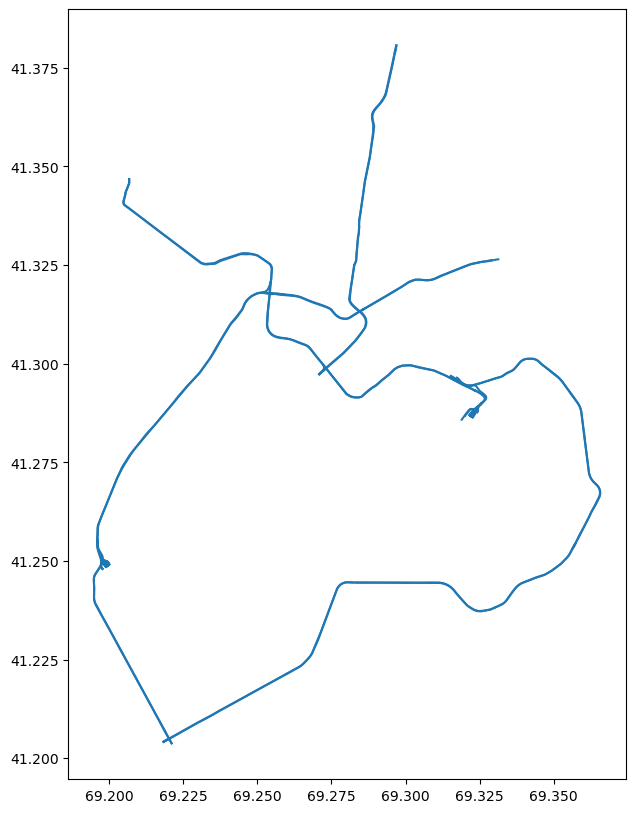

In [8]:
pd_gdf_ways.plot(figsize=(10,10))
plt.show()